In [22]:
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import numpy as np
from PIL import Image
from keras.preprocessing import image

In [23]:
path = pathlib.Path("D:/ai_route_course/cell_images") 

In [25]:
#read two folders
Parasitized = list(path.glob('Parasitized/*'))
Uninfected = list(path.glob('Uninfected/*'))

In [26]:
data = {
    'Parasitized' : Parasitized,
    'Uninfected' :Uninfected
}

data_labels = {
    0: 'Parasitized',
    1: 'Uninfected'
}

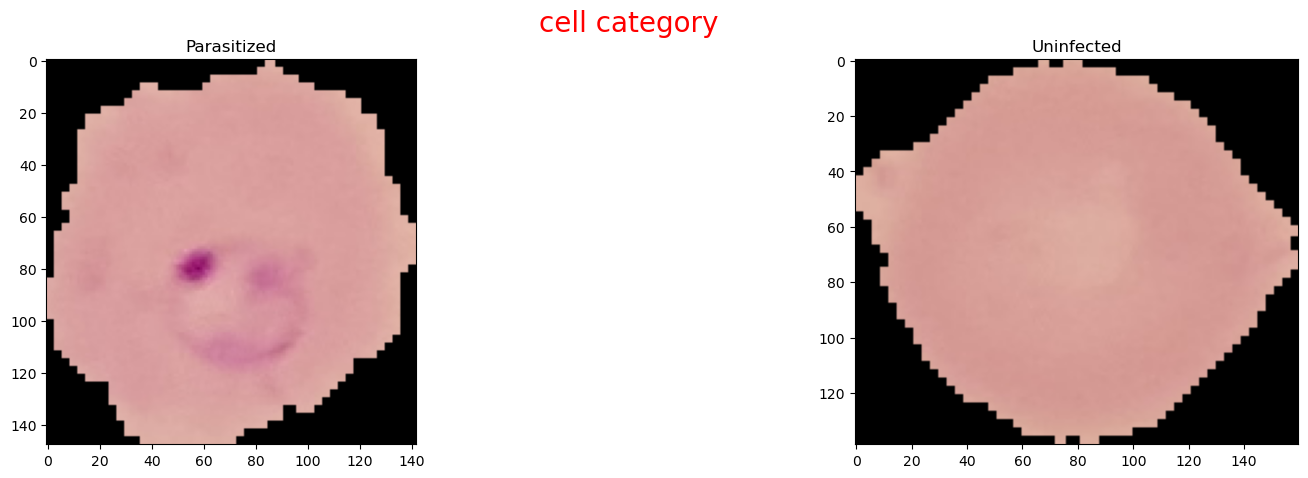

In [27]:
fig,ax = plt.subplots(ncols = 2, figsize = (20,5))
fig.suptitle("cell category", color = 'red', fontsize = 20)

Parasitized_img = img.imread(Parasitized[0])
Uninfected_img = img.imread(Uninfected[0])

for index, name in enumerate(list(data.keys())):
    ax[index].set_title(name)

ax[0].imshow(Parasitized_img)
ax[1].imshow(Uninfected_img)

In [29]:
#define augmentation
data_aug = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)
#train data
train_data = data_aug.flow_from_directory(
    directory = 'D:/ai_route_course/cell_images',
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'training'
)

Found 22048 images belonging to 2 classes.


In [30]:
#test data
test_data = data_aug.flow_from_directory(
    directory = 'D:/ai_route_course/cell_images',
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'validation'
)

Found 5510 images belonging to 2 classes.


In [31]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu', input_shape = [128,128,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())

#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(1, activation = 'sigmoid'))

In [32]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [33]:
model_history = cnn_model.fit(train_data,
                             epochs = 5,
                             validation_data = test_data,
                             )

Epoch 1/5
1378/1378 [==============================] - 729s 525ms/step - loss: 0.3851 - accuracy: 0.8134 - val_loss: 0.2060 - val_accuracy: 0.9303
Epoch 2/5
1378/1378 [==============================] - 553s 402ms/step - loss: 0.1766 - accuracy: 0.9377 - val_loss: 0.2000 - val_accuracy: 0.9348
Epoch 3/5
1378/1378 [==============================] - 468s 340ms/step - loss: 0.1380 - accuracy: 0.9504 - val_loss: 0.1942 - val_accuracy: 0.9345
Epoch 4/5
1378/1378 [==============================] - 1121s 814ms/step - loss: 0.1023 - accuracy: 0.9639 - val_loss: 0.2199 - val_accuracy: 0.9343
Epoch 5/5
1378/1378 [==============================] - 446s 324ms/step - loss: 0.0724 - accuracy: 0.9727 - val_loss: 0.3071 - val_accuracy: 0.9270


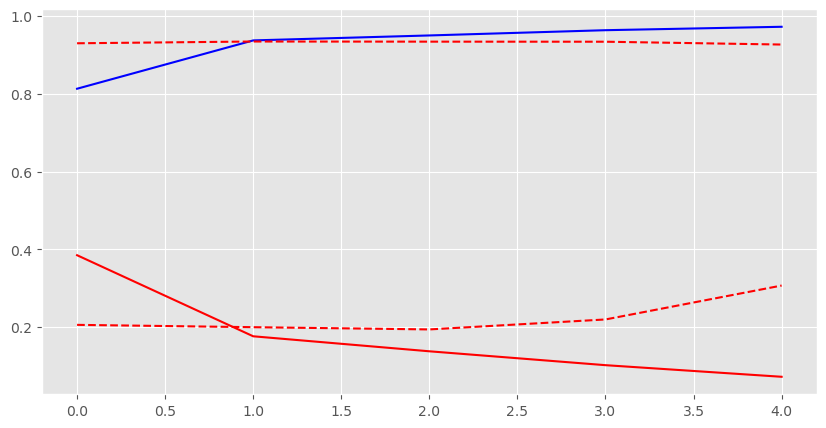

In [34]:
#plot error and accuracy
h = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

plt.plot(h['loss'], c = 'red', label = 'training loss')
plt.plot(h['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

plt.plot(h['accuracy'], c = 'blue', label = 'training accuracy')
plt.plot(h['val_accuracy'], c = 'red', label = 'training loss', linestyle = '--')

In [35]:
cnn_model.evaluate(test_data)

345/345 [==============================] - 20s 59ms/step - loss: 0.3071 - accuracy: 0.9270


[0.3070790469646454, 0.92704176902771]

In [37]:
testing_image = 'D:/ai_route_course/cell_images/Parasitized/C38P3thinF_original_IMG_20150621_112043_cell_202.png'

In [38]:
class_map = dict([v,k] for k,v in train_data.class_indices.items())
class_map

{0: 'Parasitized', 1: 'Uninfected'}

In [39]:
import numpy as np
from PIL import Image
from keras.preprocessing import image

def predictions(testing_image, actual_label):
    
    #load and preprocessing image
    test_img = image.load_img(testing_image, target_size = (128,128))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))
    
    #make prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]
    
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')

1/1 [==============================] - 0s 305ms/step


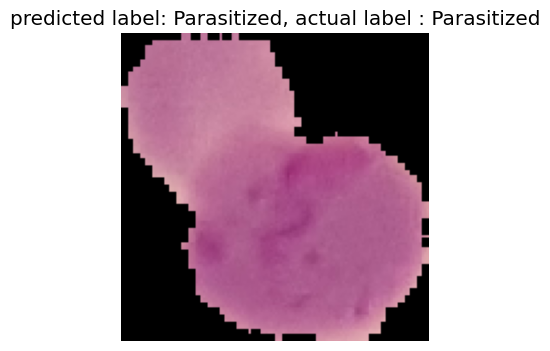

In [40]:
predictions(testing_image, actual_label = 'Parasitized')